In [1]:
#Importing proper tools to do analysis


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

# Linear Regression

In [2]:
#Loading the dataset used for analysis

noise = pd.read_csv(
    'airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

In [3]:
#What does the dataset look like?

noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is a dataset provided by NASA that contains different size NACA 0012 airfoils at various wind tunnel speeds and angles of attack.
According to Wikipedia, the NACA airfoils are airfoil shapes for aircraft wings developed by the National Advisory Committee for Aeronautics (NACA).  
The independent or x-variables are: Frequency denoted in Hertzs, angle of attack denoted in degrees, chord length denoted in meters, free-stream velocity denoted in meters per second, and suction side displacement thickness denoted in meters.
The dependent or y-variable is scaled sound pressure level, in decibels.
A model could be useful because if you can predict sounds that correspond with certain turbulences you can increase the safety of the aircraft AND the ability for people to respond to such turbulences if they occur.

### Find out how many rows and columns are in noise.

In [4]:
#There are 1503 rows and 6 columns in "noise"

noise.shape

(1503, 6)

### Find out what data types are present.

In [5]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

### Find out how many null values there are in each columns.

In [6]:
#There are apparently zero null values in this dataset.

noise.isna().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

### Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [7]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


### Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

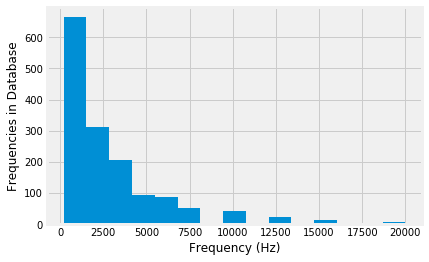

In [8]:
#Here is frequency

ax = noise.loc[:,"frequency"].plot(kind='hist', bins=15)
plt.ylabel("Frequencies in Database")
plt.xlabel("Frequency (Hz)");

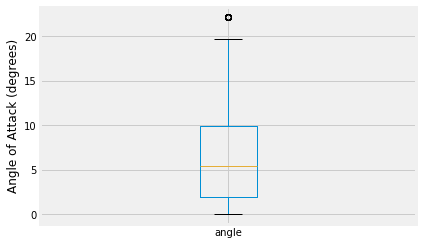

In [9]:
#Here is angle

ax = noise.loc[:,"angle"].plot(kind='box')
plt.ylabel("Angle of Attack (degrees)");

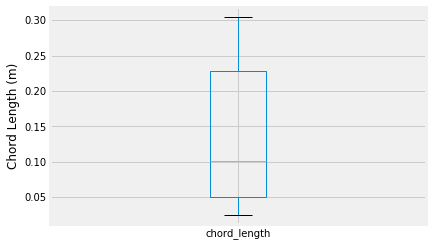

In [10]:
#Here is chord_length

ax = noise.loc[:,"chord_length"].plot(kind='box')
plt.ylabel("Chord Length (m)");

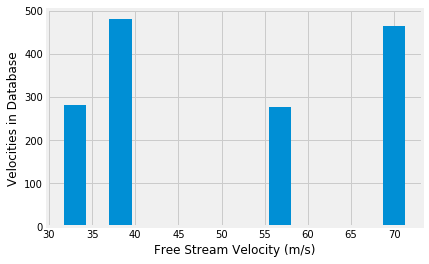

In [11]:
#Here is free_stream_velocity

ax = noise.loc[:,"free_stream_velocity"].plot(kind='hist', bins=15)
plt.ylabel("Velocities in Database")
plt.xlabel("Free Stream Velocity (m/s)");

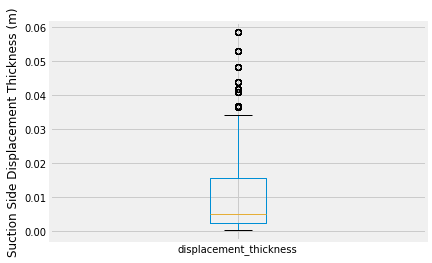

In [12]:
#Here is displacement_thickness

ax = noise.loc[:,"displacement_thickness"].plot(kind='box')
plt.ylabel("Suction Side Displacement Thickness (m)");

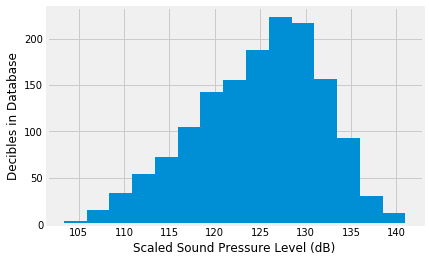

In [13]:
#Here is self_noise

noise.loc[:,"self_noise"].plot(kind='hist', bins=15)
plt.ylabel("Decibles in Database")
plt.xlabel("Scaled Sound Pressure Level (dB)");

#### I just wanted to note that I tried using a bar chart for these variables and they looked terrible each time. Box plots and histograms looked much better in visualizing the data.

### Which variables are approximately normally distributed?

Chord_length and self_noise are both normally distributed

### Which variables show strong skew?

Displacement_thickness and frequency both show a strong skew

### Make a scatterplot of each feature variable with the target variable.

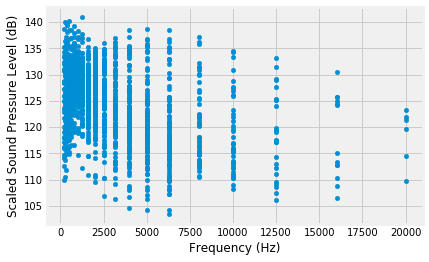

In [14]:
#Here is how frequency relates to self_noise

ax = noise.plot(kind='scatter', x='frequency', y='self_noise')
plt.ylabel("Scaled Sound Pressure Level (dB)")
plt.xlabel("Frequency (Hz)");

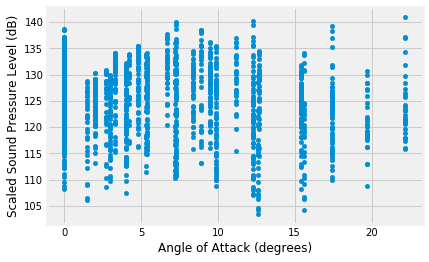

In [15]:
#Here is how angle relates to self_noise

ax = noise.plot(kind='scatter', x='angle', y='self_noise')
plt.ylabel("Scaled Sound Pressure Level (dB)")
plt.xlabel("Angle of Attack (degrees)");

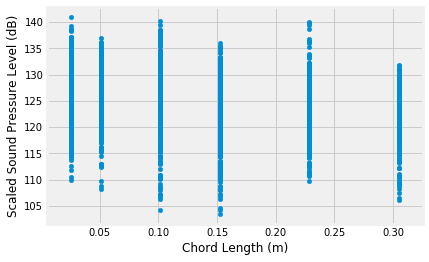

In [16]:
#Here is how chord_length relates to self_noise

ax = noise.plot(kind='scatter', x='chord_length', y='self_noise')
plt.ylabel("Scaled Sound Pressure Level (dB)")
plt.xlabel("Chord Length (m)");

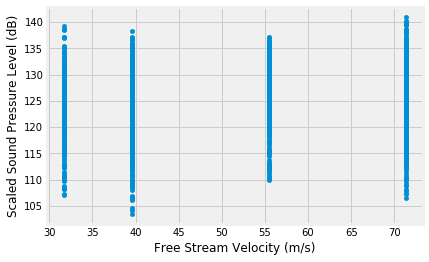

In [17]:
#Here is how free_stream_velocity relates to self_noise

ax = noise.plot(kind='scatter', x='free_stream_velocity', y='self_noise')
plt.ylabel("Scaled Sound Pressure Level (dB)")
plt.xlabel("Free Stream Velocity (m/s)");

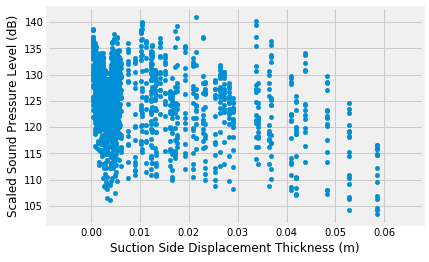

In [18]:
#Here is how displacement_thickness relates to self_noise

ax = noise.plot(kind='scatter', x='displacement_thickness', y='self_noise')
plt.ylabel("Scaled Sound Pressure Level (dB)")
plt.xlabel("Suction Side Displacement Thickness (m)");

### Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

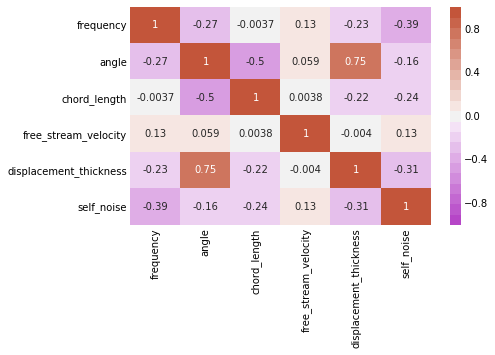

In [19]:
ax = sns.heatmap(noise.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(300, 20, n=21))

### What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

I notice that there are no independent variables that are strongly correlated to the output variable self_noise. Based on the scatterplots there doesn't seem to be a linear relationship between the x-variables and y-variable. If the first model I run has a poor prediction score, then I believe some transformation of the data will need to be done like log transformations.

### Develop a linear regression model to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [20]:
#Separating the variables between X and y

X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, 'self_noise']

In [21]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [22]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
#Scoring the model on the training set and test set.

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5481871752628438
0.4162609238734273


### How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed 55% (.548) better on the training set compared to the null model. I don't think we can interpret bias/variance for this model because .55 isn't suspicious like a perfect score of 1 or concerning like a score of 0. We know that it's better than the null model and that's the most important part.

### How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed better on the training set than the test set. This result means that there is high variance in the model. However, the model is not very predictive either so there is a high bias problem as well.

### Does your model appear to have more of a bias problem or more of a variance problem? Why?

Although the model has a high variance problem, I believe it has more of a bias problem than a variance problem since the target variable is not being predicted with a great amount of accuracy. I think we have high bias and high variance, but I would rather focus on the bias so we can get a better predictive score, then worry about the variance. 

### Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [24]:
#Separating the variables between X and y

X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, 'self_noise']

In [25]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [26]:
#Setting up a Random Forest model using the training set
#estimators = 100 trees

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [27]:
#Scoring the model on the training set and test set.

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9898858885070303
0.9138739099092336


### Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Compared to the linear regression model, the overall predictive performance of the random forest model is much better. The training score of the random forest model captured 99% of the variance, and the test score captured 92% of the variance. Both of those scores were significantly higher than the linear regression model. In terms of bias and variance, the random forest model had much lower bias than the linear regression model, however because it has high variance as well this could be a sign of overfitting the model. Both models seem to have a variance problem since the training set performed better than the test set in both models.

### Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [28]:
#I am going to focus on improving the linear regression model since it performed so poorly.
#The first thing I am going to do is remove displacement_thickness from the model. 
#This is because displacement_thickness is highly correlated to angle, and this is a sign of collinearity.

noise = noise.drop(columns = 'displacement_thickness')
noise.head()

,frequency,angle,chord_length,free_stream_velocity,self_noise
0,800,0.0,0.3048,71.3,126.201
1,1000,0.0,0.3048,71.3,125.201
2,1250,0.0,0.3048,71.3,125.951
3,1600,0.0,0.3048,71.3,127.591
4,2000,0.0,0.3048,71.3,127.461


In [29]:
#Separating the variables between X and y

X = noise.drop('self_noise', axis='columns')
y = noise.loc[:, 'self_noise']

In [30]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [31]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
#Scoring the model on the training set and test set.
#This actually made the model worse, but I still believe I made the right call to correct for collinearity.

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.5138350304438978
0.3922286250006477


C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


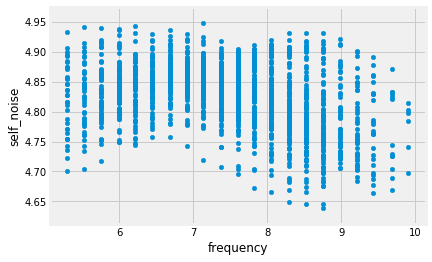

In [33]:
#Although it doesn't seem like a log transformation would work I tried it out anyway just in case.

log_noise = np.log(noise)
ax = log_noise.plot(kind='scatter', x='frequency', y='self_noise');

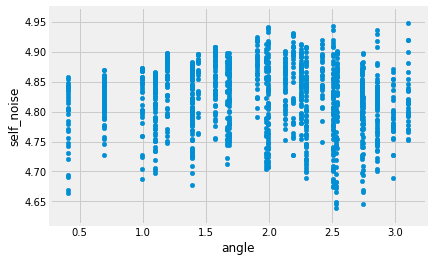

In [34]:
#It looks like I was correct as the transformations didn't make much of a difference in the relationship between the x and y variables

ax = log_noise.plot(kind='scatter', x='angle', y='self_noise');

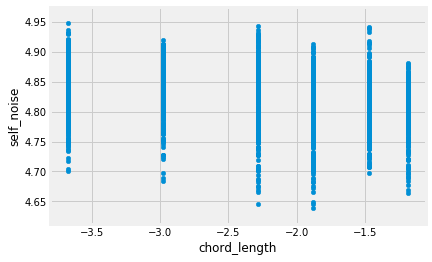

In [35]:
ax = log_noise.plot(kind='scatter', x='chord_length', y='self_noise');

In [36]:
#Since log transformation didn't work, I wanted to test if polynomial transformation would work.

noise.loc[:, 'frequency_squared'] = noise.loc[:, 'frequency']**2
noise.head(3)

,frequency,angle,chord_length,free_stream_velocity,self_noise,frequency_squared
0,800,0.0,0.3048,71.3,126.201,640000
1,1000,0.0,0.3048,71.3,125.201,1000000
2,1250,0.0,0.3048,71.3,125.951,1562500


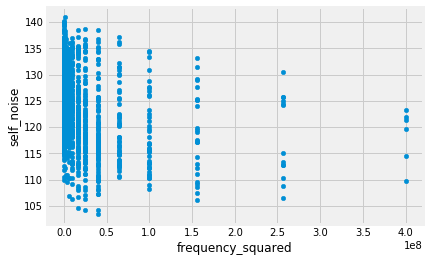

In [37]:
#It did not

ax = noise.plot(kind='scatter', x='frequency_squared', y='self_noise');

In [38]:
#The last thing I could think of to improve the model was creating an interaction variable. 
#I know very little about physics, but I vaguely recall frequency and velocity being related. 
#Perhaps as an interaction term they can be a useful predictor of self_noise

feature_cols = ['frequency', 'free_stream_velocity']
X = noise.loc[:, feature_cols]
X.loc[:, 'INTERACTION'] = X.loc[:, 'frequency'] * X.loc[:, 'free_stream_velocity']
y = noise.loc[:, 'self_noise']

In [39]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)


In [40]:
#Setting up a linear regression model using the training set

from sklearn.linear_model import LinearRegression

lr_interaction = LinearRegression()

lr_interaction.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
#Scoring the model on the training set and test set.
#My attempts to make the model better have just gotten worse and worse.

print(lr_interaction.score(X_train, y_train))
print(lr_interaction.score(X_test, y_test))

0.21922889792217026
0.07936435389313634


# Classification

In [42]:
#Loading the dataset

credit = pd.read_csv(
    'crx.data',
    names=range(1, 17)
)

In [43]:
#Taking a look at the dataset

credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is apparently a dataset detailing approval for credit card applications. I honestly do not know how to interpret this dataset. I am assuming that either Column 1 (a or b) or Column 16 (+ or -) are the y-variable (approved or denied). I am assuming the other columns detail things like credit score, net worth, gender, race, etc. If I can understand this dataset better, then this model can be useful for financial firms in the credit card approval process and to customers looking to obtain credit cards. For now I am also going to assume that the "t" and "f" in columns 9,10, and 12 stand for "True" and "False.

### Find out how many rows and columns are in credit.

In [44]:
#There are 690 rows and 16 columns in "credit"

credit.shape

(690, 16)

### Find out what data types are present.

In [45]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

### Columns 2 and 3 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [46]:
#First of all it looks like only column 2 is an "object" whereas column 3 is a "float"
#Second of all, in order to deal with "?" I am going to see where it's located in column 2.

credit.loc[credit.loc[:,2] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
83,a,?,3.500,u,g,d,v,3.000,t,f,0,t,g,00300,0,-
86,b,?,0.375,u,g,d,v,0.875,t,f,0,t,s,00928,0,-
92,b,?,5.000,y,p,aa,v,8.500,t,f,0,f,g,00000,0,-
97,b,?,0.500,u,g,c,bb,0.835,t,f,0,t,s,00320,0,-
254,b,?,0.625,u,g,k,v,0.250,f,f,0,f,g,00380,2010,-
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
329,b,?,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,-
445,a,?,11.250,u,g,ff,ff,0.000,f,f,0,f,g,?,5200,-
450,b,?,3.000,y,p,i,bb,7.000,f,f,0,f,g,00000,1,-
500,b,?,4.000,u,g,x,v,5.000,t,t,3,t,g,00290,2279,+


In [47]:
#Now that I see where it is, I am going to drop all the rows that contain it to clean my dataset

credit = credit.drop([83,86,92,97,254,286,329,445,450,500,515,608], axis=0)

In [48]:
#Here I am double checking to see if my drop method worked
#It did since now we have less rows than we started with

credit.shape

(678, 16)

In [49]:
#Now I can safely transform column 2 from an object into a a float

credit = credit.astype({2: float})

In [50]:
#Here I am checking to see if my conversion was successful.
#It is since column 2 is now denoted as "float64"

credit.dtypes

1      object
2     float64
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

### Find out how many null values there are in each columns.

In [51]:
#There are apparently no null values in this dataset too.
#However, we know that there was a special character "?" in the dataset, can it be prevalent elsewhere?
credit.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [52]:
credit.loc[credit.loc[:,1] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
248,?,24.50,12.750,u,g,c,bb,4.750,t,t,2,f,g,00073,444,+
327,?,40.83,3.500,u,g,i,bb,0.500,f,f,0,f,s,01160,0,-
346,?,32.25,1.500,u,g,c,v,0.250,f,f,0,t,g,00372,122,-
374,?,28.17,0.585,u,g,aa,v,0.040,f,f,0,f,g,00260,1004,-
453,?,29.75,0.665,u,g,w,v,0.250,f,f,0,t,g,00300,0,-
479,?,26.50,2.710,y,p,?,?,0.085,f,f,0,f,s,00080,0,-
489,?,45.33,1.000,u,g,q,v,0.125,f,f,0,t,g,00263,0,-
520,?,20.42,7.500,u,g,k,v,1.500,t,t,1,f,g,00160,234,+
598,?,20.08,0.125,u,g,q,v,1.000,f,t,1,f,g,00240,768,+
601,?,42.25,1.750,y,p,?,?,0.000,f,f,0,t,g,00150,1,-


In [53]:
credit.loc[credit.loc[:,4] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
206,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
270,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
330,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
456,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
592,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
622,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


In [54]:
credit.loc[credit.loc[:,5] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
206,a,71.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
270,b,37.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
330,b,20.42,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
456,b,34.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,-
592,b,23.17,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+
622,a,25.58,0.0,?,?,?,?,0.0,f,f,0,f,p,?,0,+


In [55]:
credit.loc[credit.loc[:,6] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
206,a,71.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
270,b,37.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
330,b,20.42,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,-
456,b,34.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,-
479,?,26.50,2.71,y,p,?,?,0.085,f,f,0,f,s,00080,0,-
539,b,80.25,5.50,u,g,?,?,0.540,t,f,0,f,g,00000,340,-
592,b,23.17,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
601,?,42.25,1.75,y,p,?,?,0.000,f,f,0,t,g,00150,1,-
622,a,25.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+


In [56]:
credit.loc[credit.loc[:,7] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
206,a,71.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
270,b,37.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
330,b,20.42,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,-
456,b,34.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,-
479,?,26.50,2.71,y,p,?,?,0.085,f,f,0,f,s,00080,0,-
539,b,80.25,5.50,u,g,?,?,0.540,t,f,0,f,g,00000,340,-
592,b,23.17,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+
601,?,42.25,1.75,y,p,?,?,0.000,f,f,0,t,g,00150,1,-
622,a,25.58,0.00,?,?,?,?,0.000,f,f,0,f,p,?,0,+


In [57]:
credit.loc[credit.loc[:,14] == '?']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0,t,g,?,0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6,f,g,?,600,+
206,a,71.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5,f,g,?,26726,+
270,b,37.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0,f,g,?,0,-
330,b,20.42,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2,f,g,?,18,-
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
592,b,23.17,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,+


In [58]:
#There clearly are a lot more "?" so I am going to drop even more rows that contain it to clean my dataset

credit = credit.drop([71,202,206,248,270,327,330,346,374,453,456,479,489,520,539,592,598,601,622,641,673], axis=0)

In [59]:
#Here I am double checking to see if my drop method worked
#It did since now we have even less rows than we started with

credit.shape

(657, 16)

### Check basic summary information for each column, including categorical columns.

In [60]:
credit.describe()

,2,3,8,11,15
count,657.000000,657.000000,657.000000,657.000000,657.000000
mean,31.472831,4.856385,2.235259,2.497717,1048.295282
std,11.826519,5.027175,3.363966,4.956249,5332.908689
min,13.750000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,0.000000
50%,28.330000,2.875000,1.000000,0.000000,5.000000
75%,38.250000,7.540000,2.625000,3.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,100000.000000


In [61]:
credit.describe(include='object')

,1,4,5,6,7,9,10,12,13,14,16
count,657,657,657,657,657,657,657,657,657,657,657
unique,2,3,3,14,9,2,2,2,3,165,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,452,500,500,133,383,350,368,354,602,128,360


### Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

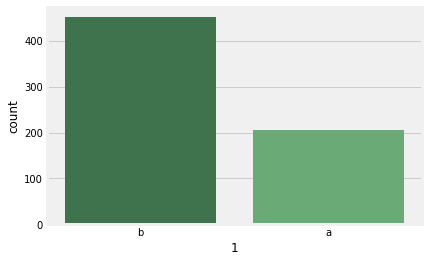

In [62]:
#Here is column 1
#It tells me I can't plot non-numerical data, but I found online you can use Seaborn to get around that

sns.countplot(x= 1, data=credit, palette="Greens_d");


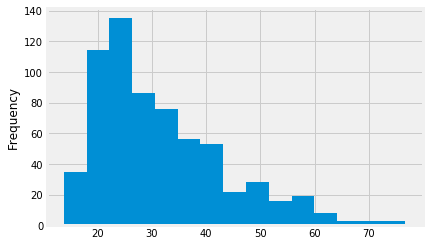

In [63]:
#Here is column 2

credit.loc[:, 2].plot(kind='hist', bins=15)

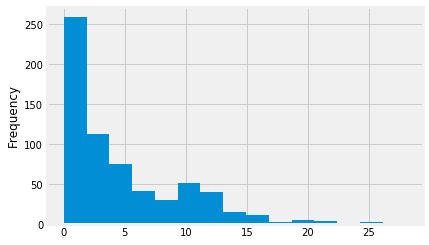

In [64]:
#Here is column 3

credit.loc[:, 3].plot(kind='hist', bins=15)

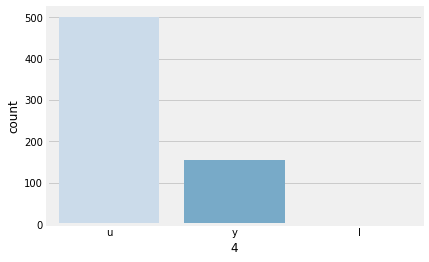

In [65]:
#Here is column 4

sns.countplot(x= 4, data=credit, palette="Blues");

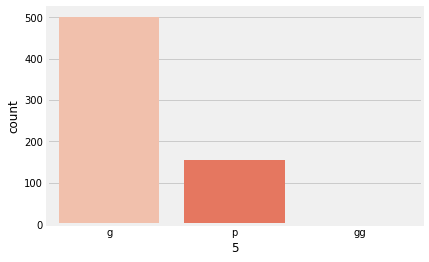

In [66]:
#Here is column 5

sns.countplot(x= 5, data=credit, palette="Reds");

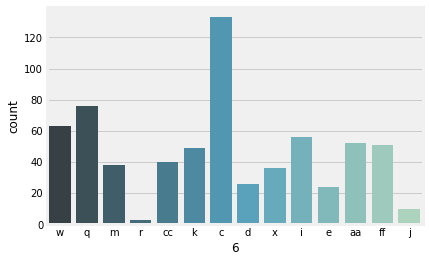

In [67]:
#Here is column 6

sns.countplot(x= 6, data=credit, palette="GnBu_d");

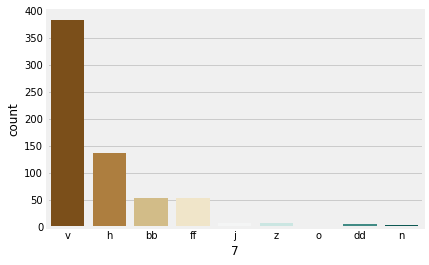

In [68]:
#Here is column 7

sns.countplot(x= 7, data=credit, palette="BrBG");

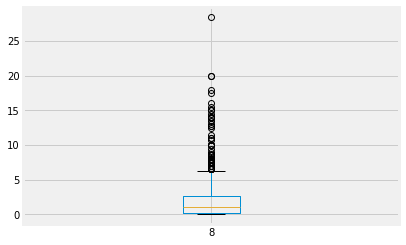

In [69]:
#Here is column 8

credit.loc[:, 8].plot(kind='box')

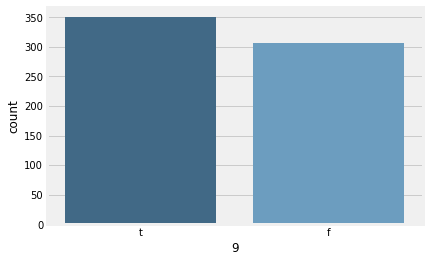

In [70]:
#Here is column 9

sns.countplot(x= 9, data=credit, palette="Blues_d");

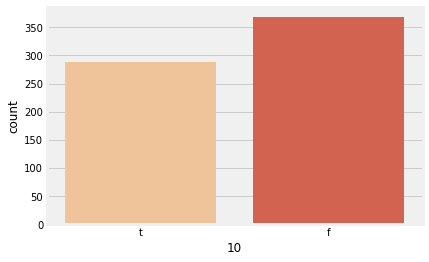

In [71]:
#Here is column 10

sns.countplot(x= 10, data=credit, palette="OrRd");

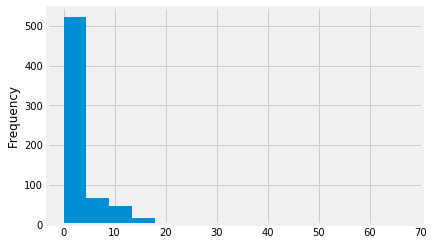

In [72]:
#Here is column 11

credit.loc[:, 11].plot(kind='hist', bins=15);

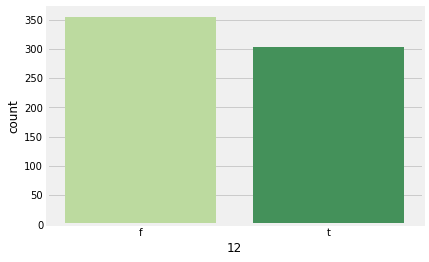

In [73]:
#Here is column 12

sns.countplot(x= 12, data=credit, palette="YlGn");

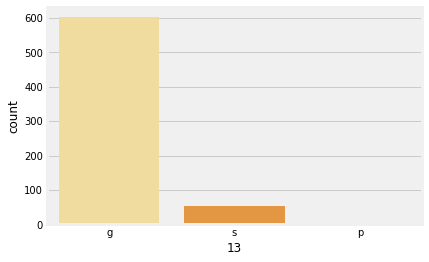

In [74]:
#Here is column 13

sns.countplot(x= 13, data=credit, palette="YlOrBr");

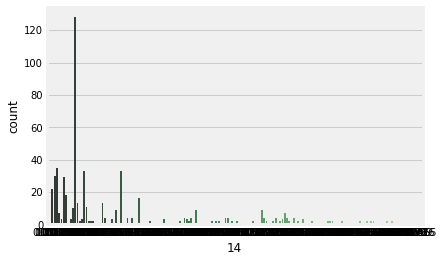

In [75]:
#Here is column 14

sns.countplot(x= 14, data=credit, palette="Greens_d",);

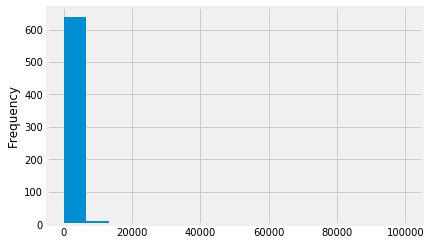

In [76]:
#Here is column 15

credit.loc[:, 15].plot(kind='hist', bins=15);

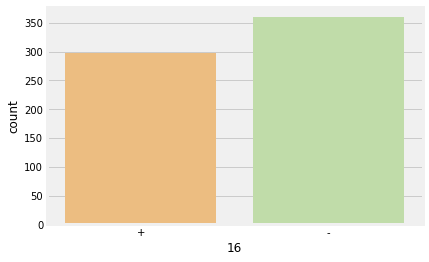

In [77]:
#Here is column 16

sns.countplot(x= 16, data=credit, palette="Spectral");

### Which variables are approximately normally distributed?

Columns 9,10,12 and 16 are normally distributed

### Which variables show strong skew?

Columns 3,4,5,7,8,11,13 and 15 all show a strong skew

### Make a scatterplot of each feature variable with the target variable.

In [78]:
#I am converting the "+" and "-" in column 16 to 0 and 1 so I can get a numerical value in order to do the scatter plots

credit.replace(["+", "-"], [0, 1], inplace=True)
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,0
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,0
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,0
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,0


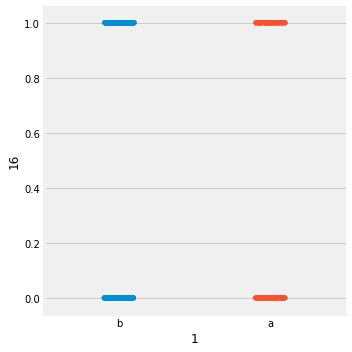

In [79]:
#Here is column 1

ax = sns.catplot(x=1, y=16, data=credit);

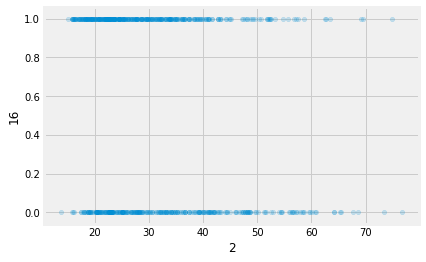

In [80]:
#Here is column 2

ax = credit.plot(kind='scatter', x=2, y=16, alpha=.2)

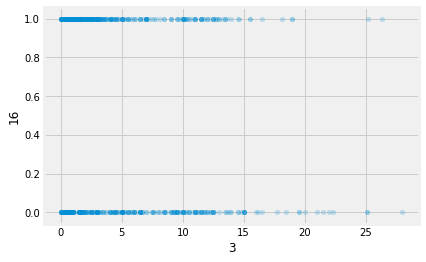

In [81]:
#Here is column 3

aax = credit.plot(kind='scatter', x=3, y=16, alpha=.2)

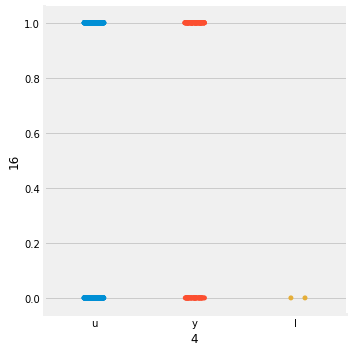

In [82]:
#Here is column 4

ax = sns.catplot(x=4, y=16, data=credit);

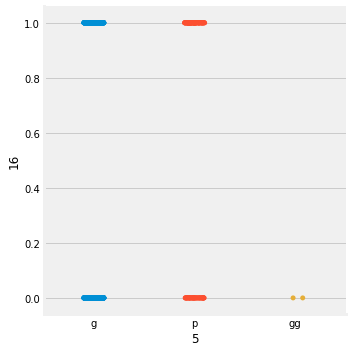

In [83]:
#Here is column 5

ax = sns.catplot(x=5, y=16, data=credit);

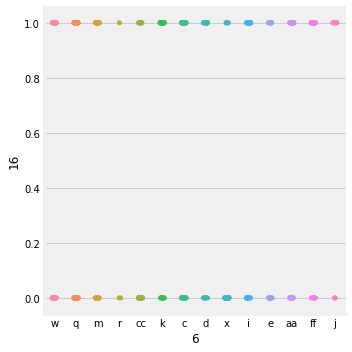

In [84]:
#Here is column 6

ax = sns.catplot(x=6, y=16, data=credit);

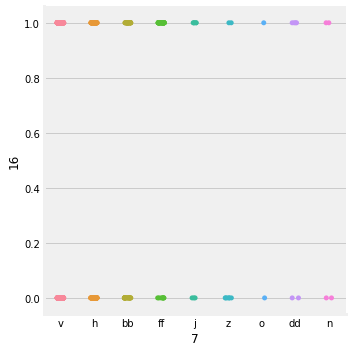

In [85]:
#Here is column 7

ax = sns.catplot(x=7, y=16, data=credit);

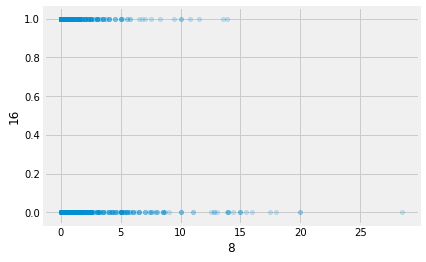

In [86]:
#Here is column 8

aax = credit.plot(kind='scatter', x=8, y=16, alpha=.2)

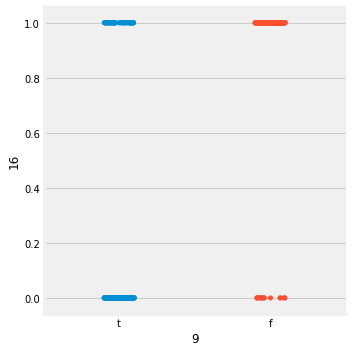

In [87]:
#Here is column 9

ax = sns.catplot(x=9, y=16, data=credit);

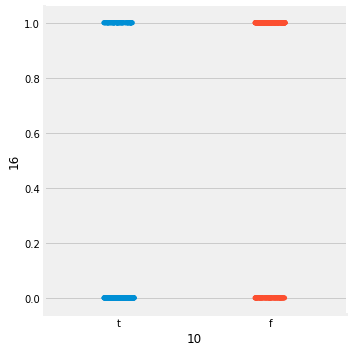

In [88]:
#Here is column 10

ax = sns.catplot(x=10, y=16, data=credit);

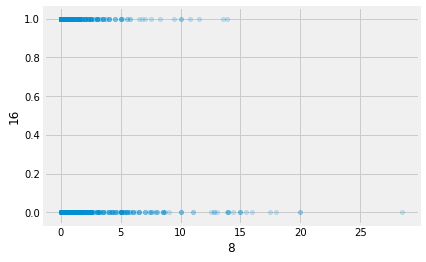

In [89]:
#Here is column 11

aax = credit.plot(kind='scatter', x=8, y=16, alpha=.2)

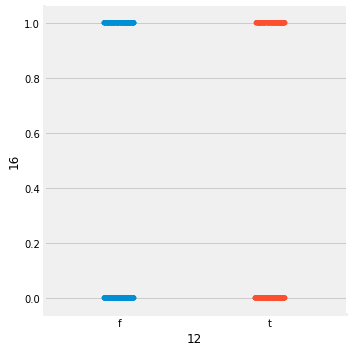

In [90]:
#Here is column 12

ax = sns.catplot(x=12, y=16, data=credit);

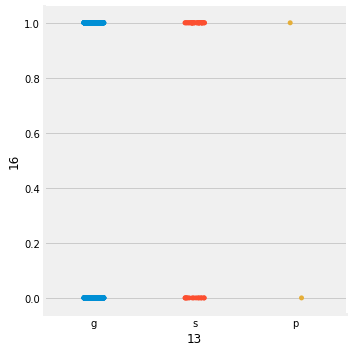

In [91]:
#Here is column 13

ax = sns.catplot(x=13, y=16, data=credit);

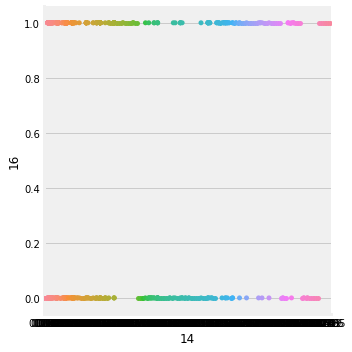

In [92]:
#Here is column 14

ax = sns.catplot(x=14, y=16, data=credit);

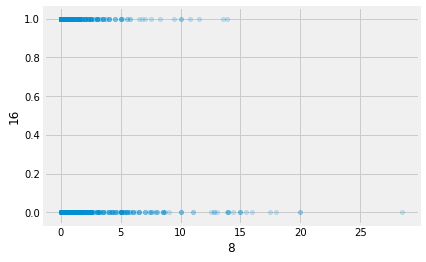

In [93]:
#Here is column 15

aax = credit.plot(kind='scatter', x=8, y=16, alpha=.2)

### Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

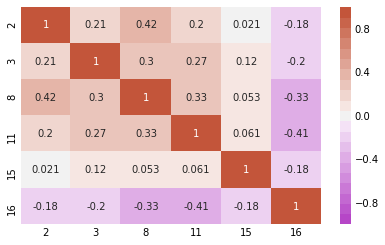

In [94]:
credit_numeric = credit.loc[:,[2,3,8,11,15,16]]

ax = sns.heatmap(credit_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(300, 20, n=21))

### What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Well, there are a lot of non-numeric values so I'm not quite sure how to fit those in. Cleary the y-variable is a classification type problem so logistic regression should be used instead of linear regression.

### What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [95]:
#Here I am counting the most common outcome, which is "1", which I am assuming means the credit card was approved. 

credit.loc[:,16].value_counts()

1    360
0    297
Name: 16, dtype: int64

In [96]:
#If you guess "1" every time, you will be right 360 out of 657 times.
#This calculates as the following:
#You will be right 55% of the time. 

print(360/657)

0.547945205479452


### Develop a logistic regression model to predict the target variable. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [97]:
credit = pd.get_dummies(credit, columns=[1,4,5,6,7,9,10,12,13,14])

In [98]:
#Separating the variables between X and y

X = credit.drop(16, axis='columns')
y = credit.loc[:, 16]

In [99]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [100]:
#Setting up a Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

logr.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
print(logr.score(X_train, y_train))
print(logr.score(X_test, y_test))

0.9106753812636166
0.8535353535353535


### How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Compared to the null model, our logistic regression model outperformed it massively. Our training set captured 91% of the variance and our test set captured 85% of the variance. As we recall, the null model would have only been correct 55% of the time. Like with the linear regression model I don't think we can tell much about variance or bias by comparing our model to a null model.

### How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The model performed better on the training set than the test set. This indicates a variance problem in the model although in my opinion the variance problem doesn't seem too big in this case.

### Does your model appear to have more of a bias problem or more of a variance problem? Why?

In this case I believe it has more of a variance problem than a bias problem because it has pretty good predictive abilities, but the discrepancy between the test set and training set indicates more data should be collected.

### Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [102]:
#Separating the variables between X and y

X = credit.drop(16, axis='columns')
y = credit.loc[:, 16]

In [103]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [104]:
#Setting up a Random Forest Model
#estimators=100 trees

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8585858585858586


### Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Well, the random forest model definitely outdoes the standard logistic regression model in terms of predictive performance. It has lower bias than the standard logistic regression model. However, it seems to have a higher variance problem than the standard logistic regression model. Also, I am not denying you can't get a perfect predicted score, but I'm a natural skeptic and would have to investigate much further if the perfect prediction on the training set makes sense.

### Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [105]:
#I want to improve the standard logistic regression model
#Specifically, I want to evaluate the precision of the model
#This is because I am looking at this through the eyes of a financial institution. I do not want to lend money (via credit card)
#to people who will not be able to afford it.
#Increasing precision will help avoid false positives of approving credit when approval shouldn't have occured

#Separating the variables between X and y

X = credit.drop(16, axis='columns')
y = credit.loc[:, 16]

In [106]:
#Setting up a training set and a test set
#test_size = .3 means 30% of the data is set aside for the test set. 70% of the data is used for the training set
#You could also use train_size if you wish

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=30)

In [107]:
#Setting up a Logistic Regression Model

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()

logr.fit(X_train, y_train)

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
#Importing metric tools to evaluate precision
#We want a B score below 1 in order to have increased precision

from sklearn import metrics
y_pred_prob = logr.predict_proba(X_test)[:, 1]

In [109]:
#Setting up a function to determine the best threshold 

best_score = -1
best_threshold = -1

for threshold in sorted(set(y_pred_prob)):
    y_pred_thresh = y_pred_prob > threshold
    score = metrics.fbeta_score(y_test, y_pred_thresh, 2)
    if score > best_score:
        best_score = score
        best_threshold = threshold

best_threshold

C:\Users\kalstedh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2277670877539688

In [110]:
y_pred_thresh = y_pred_prob > best_threshold

In [111]:
#What is the precision score of our model?
#Our precision score is 80%, so we have 20% false positives, or people who should not have received credit card approval

metrics.precision_score(y_test, y_pred_thresh)

0.8045112781954887

In [112]:
#Our B score is below 1 though

metrics.fbeta_score(y_test, y_pred_thresh, 2)

0.9208261617900173

In [113]:
#Testing out different thresholds

metrics.fbeta_score(y_test, y_pred_thresh, .5)

0.8307453416149069

In [114]:
#Testing out different thresholds

metrics.fbeta_score(y_test, y_pred_thresh, .1)

0.8057709513868178